<a href="https://colab.research.google.com/github/alt41r/ML/blob/master/crypto_analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

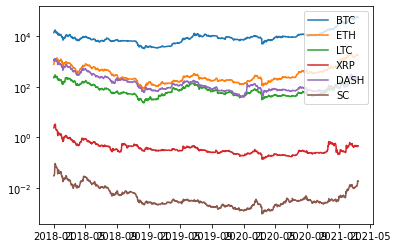

                     BTC          ETH  ...         DASH        SC
Date                                   ...                       
2018-01-01  13657.200195   772.640991  ...  1053.979980  0.030770
2018-01-02  14982.099609   884.443970  ...  1217.719971  0.030722
2018-01-03  15201.000000   962.719971  ...  1170.739990  0.032952
2018-01-04  15599.200195   980.921997  ...  1229.790039  0.039108
2018-01-05  17429.500000   997.719971  ...  1152.410034  0.070152
...                  ...          ...  ...          ...       ...
2021-03-13  61243.085938  1924.685425  ...   243.483582  0.013485
2021-03-14  59302.316406  1854.564331  ...   232.742828  0.014172
2021-03-15  55907.199219  1791.702271  ...   221.194412  0.019169
2021-03-16  56804.902344  1806.971802  ...   223.322723  0.018309
2021-03-17  55257.531250  1775.860474  ...   226.186615  0.018804

[1354 rows x 6 columns]


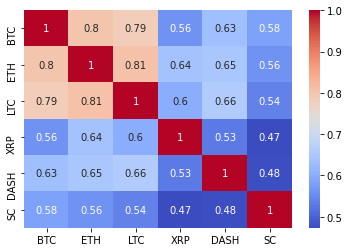

In [68]:
  
import pandas_datareader as web
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

crypto = ['BTC', 'ETH', 'LTC', 'XRP', 'DASH', 'SC']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f"{ticker}-{currency}", "yahoo", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

plt.yscale('log') # first show linear

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="upper right")

plt.show()

# # Correlation Heat Map

print(combined)

combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()